In [1]:
 import cv2
 import numpy as np
 import matplotlib.pyplot as plt
 import tensorflow as tf
 from keras.models import Sequential
 from keras.layers import Dense, Flatten, Dropout, BatchNormalization
 from keras.datasets import fashion_mnist
 from keras import backend as K
 from keras.callbacks import EarlyStopping
 from tensorflow.keras.utils import to_categorical
 from tensorflow.keras.callbacks import EarlyStopping


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [4]:
y_train= to_categorical(y_train, num_classes=10)
y_test= to_categorical(y_test, num_classes=10)


In [5]:
 num_classes = len(np.unique(y_train))
 num_classes


2

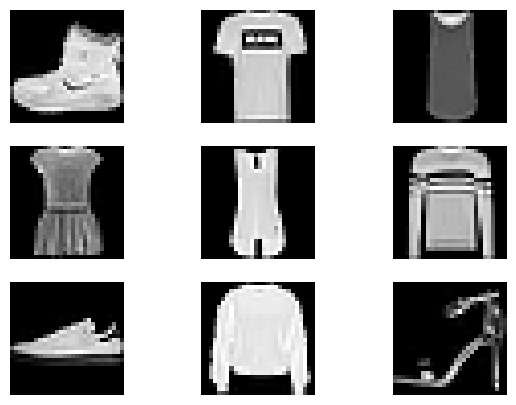

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(7, 5))
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(X_train[cnt], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1


In [7]:
early_stopping = EarlyStopping(monitor='val_loss',restore_best_weights=True, patience=3)

In [8]:
def build_model():
  model=Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(128, activation='relu'),
      BatchNormalization(),
      Dropout(0.3),
      Dense(64, activation='relu'),
      BatchNormalization(),
      Dropout(0.3),
      Dense(10, activation='softmax')
  ])
  return model

In [9]:
model1 = build_model()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)
model1.save_weights('weights_adam.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7246 - loss: 0.7913 - val_accuracy: 0.8227 - val_loss: 0.4782
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8189 - loss: 0.5148 - val_accuracy: 0.8405 - val_loss: 0.4359
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8309 - loss: 0.4780 - val_accuracy: 0.8430 - val_loss: 0.4372
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8370 - loss: 0.4619 - val_accuracy: 0.8507 - val_loss: 0.4069
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8455 - loss: 0.4395 - val_accuracy: 0.8564 - val_loss: 0.3969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8458 - loss: 0.4349 - val_accuracy: 0.8589 - val_loss: 0.3941
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8498 - loss: 0.4207 - val_accuracy: 0.8571 - val_loss: 0.3878
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8527 - loss: 0

In [10]:
model2 = build_model()
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=64, callbacks = early_stopping)
model2.save_weights('weights_sgd.weights.h5')

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8659 - loss: 0.3725 - val_accuracy: 0.8715 - val_loss: 0.3564
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8691 - loss: 0.3627 - val_accuracy: 0.8721 - val_loss: 0.3583
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8688 - loss: 0.3643 - val_accuracy: 0.8693 - val_loss: 0.3656
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8727 - loss: 0.3554 - val_accuracy: 0.8701 - val_loss: 0.3599


In [11]:
model3 = build_model()
model3.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history_SGD = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size= 128)
model3.save_weights('weights_sgdM.weights.h5')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8769 - loss: 0.3477 - val_accuracy: 0.8728 - val_loss: 0.3516
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8766 - loss: 0.3401 - val_accuracy: 0.8675 - val_loss: 0.3632
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8795 - loss: 0.3371 - val_accuracy: 0.8659 - val_loss: 0.3682
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8794 - loss: 0.3365 - val_accuracy: 0.8730 - val_loss: 0.3542
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8796 - loss: 0.3355 - val_accuracy: 0.8728 - val_loss: 0.3471
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8818 - loss: 0.3294 - val_accuracy: 0.8750 - val_loss: 0.3494
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8821 - loss: 0.3280 - val_accuracy: 0.8735 - val_loss: 0.3537
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8811 - loss: 0.3333 - val_accuracy: 0.

In [12]:
model4 = build_model()
model4.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
history_RMS = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=128, callbacks= early_stopping)
model4.save_weights('weights_RMS.weights.h5')

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8825 - loss: 0.3200 - val_accuracy: 0.8681 - val_loss: 0.3530
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8855 - loss: 0.3126 - val_accuracy: 0.8757 - val_loss: 0.3432
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8863 - loss: 0.3131 - val_accuracy: 0.8758 - val_loss: 0.3474
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8866 - loss: 0.3125 - val_accuracy: 0.8778 - val_loss: 0.3430
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8871 - loss: 0.3080 - val_accuracy: 0.8736 - val_loss: 0.3495
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8856 - loss: 0.3081 - val_accuracy: 0.8787 - val_loss: 0.3369
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8891 - loss: 0.3047 - val_accuracy: 0.8800 - val_loss: 0.3397
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8884 - loss: 0.3048 - val_accuracy: 0.

In [13]:
model5 = build_model()
model5.compile(optimizer=tf.optimizers.Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_Adagrad = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128)
model5.save_weights('weights_Adagrad.weights.h5')


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8889 - loss: 0.3055 - val_accuracy: 0.8795 - val_loss: 0.3339
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8876 - loss: 0.3039 - val_accuracy: 0.8801 - val_loss: 0.3314
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8911 - loss: 0.3008 - val_accuracy: 0.8790 - val_loss: 0.3328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8933 - loss: 0.2956 - val_accuracy: 0.8812 - val_loss: 0.3309
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8907 - loss: 0.2986 - val_accuracy: 0.8768 - val_loss: 0.3378
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8908 - loss: 0.2933 - val_accuracy: 0.8828 - val_loss: 0.3314
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8935 - loss: 0.2934 - val_accuracy: 0.8810 - val_loss: 0.3270
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8930 - loss: 0.2935 - val_accuracy: 0.

In [14]:
loss1, acc1 = model1.evaluate(X_test, y_test)
loss2, acc2 = model2.evaluate(X_test, y_test)
loss3, acc3 = model3.evaluate(X_test, y_test)
loss4, acc4 = model4.evaluate(X_test, y_test)
loss5, acc5 = model5.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8810 - loss: 0.3317
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0923 - loss: 2.4421
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0836 - loss: 2.3678
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1148 - loss: 2.4038
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1422 - loss: 2.3205


Text(0.5, 1.0, 'Loss')

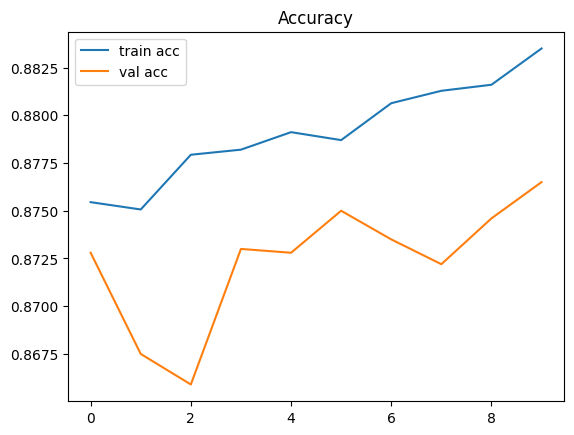

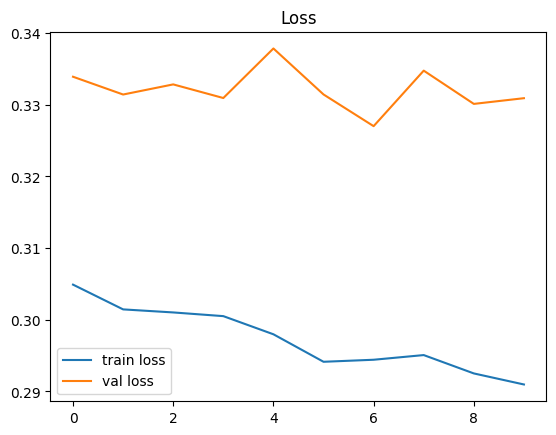

In [15]:
import matplotlib.pyplot as plt

plt.plot(history_SGD.history['accuracy'], label='train acc')
plt.plot(history_SGD.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.figure()
plt.plot(history_Adagrad.history['loss'], label='train loss')
plt.plot(history_Adagrad.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')


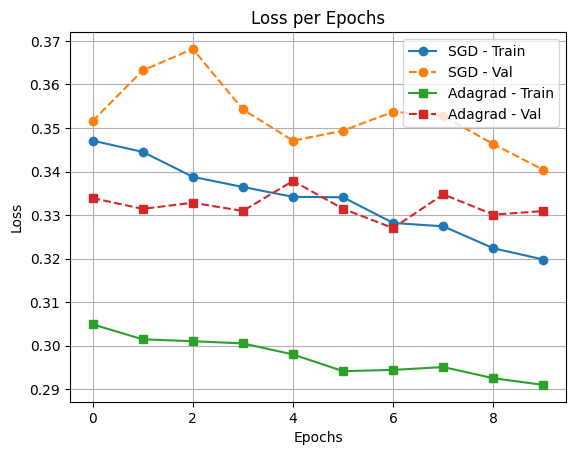

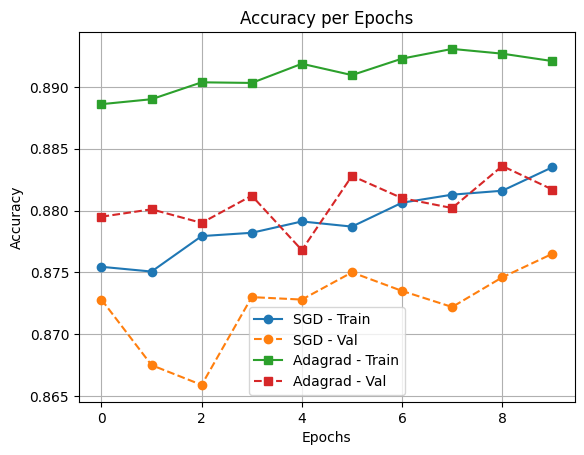

In [17]:
plt.plot(history_SGD.history['loss'], label='SGD - Train', marker='o')
plt.plot(history_SGD.history['val_loss'], label='SGD - Val', linestyle='--', marker='o')
plt.plot(history_Adagrad.history['loss'], label='Adagrad - Train', marker='s')
plt.plot(history_Adagrad.history['val_loss'], label='Adagrad - Val', linestyle='--', marker='s')

plt.title('Loss per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Accuracy Plot
plt.plot(history_SGD.history['accuracy'], label='SGD - Train', marker='o')
plt.plot(history_SGD.history['val_accuracy'], label='SGD - Val', linestyle='--', marker='o')
plt.plot(history_Adagrad.history['accuracy'], label='Adagrad - Train', marker='s')
plt.plot(history_Adagrad.history['val_accuracy'], label='Adagrad - Val', linestyle='--', marker='s')

plt.title('Accuracy per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


------------------------------------------


